In [44]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
import keras
from keras import Sequential, layers
from keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [52]:
# Load the Xception model pre-trained on ImageNet, excluding the top layers
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3)
)

# Freeze the base model
base_model.trainable = False

In [4]:
#base_model.summary()

In [53]:
my_model = Sequential()

In [54]:
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(BatchNormalization())
my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(BatchNormalization())
my_model.add(Dense(1, activation='sigmoid'))
my_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 204800)         │       819,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │    26,214,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,895,849 (182.71 MB)

 Trainable params: 26,624,513 (101.56 MB)

 Non-trainable params: 21,271,336 (81.14 MB)

In [55]:
my_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

# Define paths
train_dir = '../img_dataset/train'  
test_dir = '../img_dataset/test'    

# Set image dimensions 
img_height, img_width = 299, 299
batch_size = 16  

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  
    rotation_range=20,      
    width_shift_range=0.2,   
    height_shift_range=0.2,  
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True,    
    fill_mode='nearest'     
)

# Validation/Test Data 
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  
)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  
    shuffle=True          
)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  
)

# Print class indices
print("Class Indices:", train_generator.class_indices)

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Class Indices: {'cats': 0, 'dogs': 1}


In [57]:
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")

early_stop = EarlyStopping(patience=2, restore_best_weights=True)
my_model.fit(train_generator, validation_data=test_generator, epochs=10, callbacks=[early_stop])


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.8256 - loss: 0.4078 - val_accuracy: 0.6500 - val_loss: 1.4559
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.8806 - loss: 0.2259 - val_accuracy: 0.6500 - val_loss: 0.7991
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.9410 - loss: 0.1593 - val_accuracy: 0.8000 - val_loss: 0.3830
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.9593 - loss: 0.1125 - val_accuracy: 0.9000 - val_loss: 0.2177
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.9566 - loss: 0.0886 - val_accuracy: 0.9500 - val_loss: 0.1813
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.9947 - loss: 0.0400 - val_accuracy: 0.9500 - val_loss: 0.1431
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.9699 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 0.1005
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.9989 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss:

In [58]:
my_model.save('../model/xception_cat_dog_final.h5')


In [60]:
keras.saving.save_model(my_model, '../model/my_model.keras')

In [62]:
from tensorflow.keras.models import load_model

model = load_model('../model/xception_cat_dog_final.h5')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input

# Image path 
img_path = '../test_image/cat_601.jpg'

# Load and resize image to 299x299
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array = preprocess_input(img_array)        


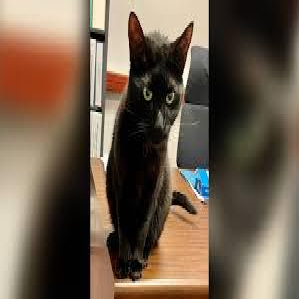

In [89]:
img

In [ ]:
prediction = model.predict(img_array)[0][0]  
# pred = model.predict(img_array)
# print(pred)
# result
if prediction >= 0.5:
    print(f"Prediction: Dog ({prediction:.2f})")
else:
    print(f"Prediction: Cat ({prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Prediction: Cat (0.00)
